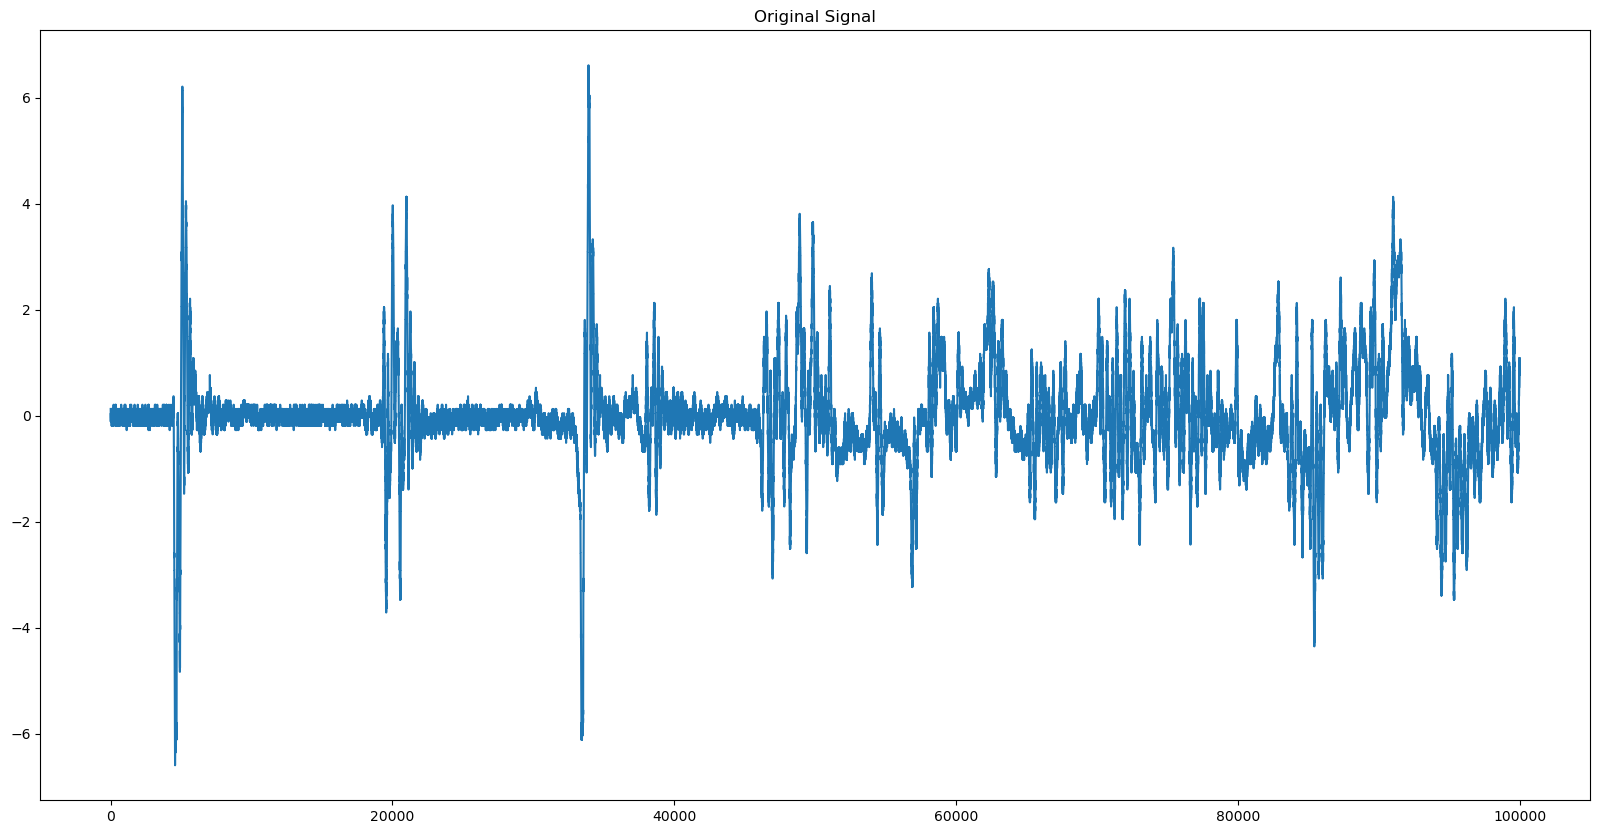

(100000,)


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = np.array(pd.read_csv('/Users/muntasirmahmud/Library/CloudStorage/OneDrive-UMBC/docker/updated_dataset/original_dataset_with_noise/L7cm_65mJ_90d/tek0501CH1.csv',header=None, low_memory=False).iloc[20:500020,1],dtype=np.float16)
x = (x- np.mean(x))

fs = 100000000

plt.figure(figsize=(20, 10))
plt.title("Original Signal")
plt.plot(x, label='Original Signal')
plt.show()

print(x.shape)

(500,)
(500,)
(500,)


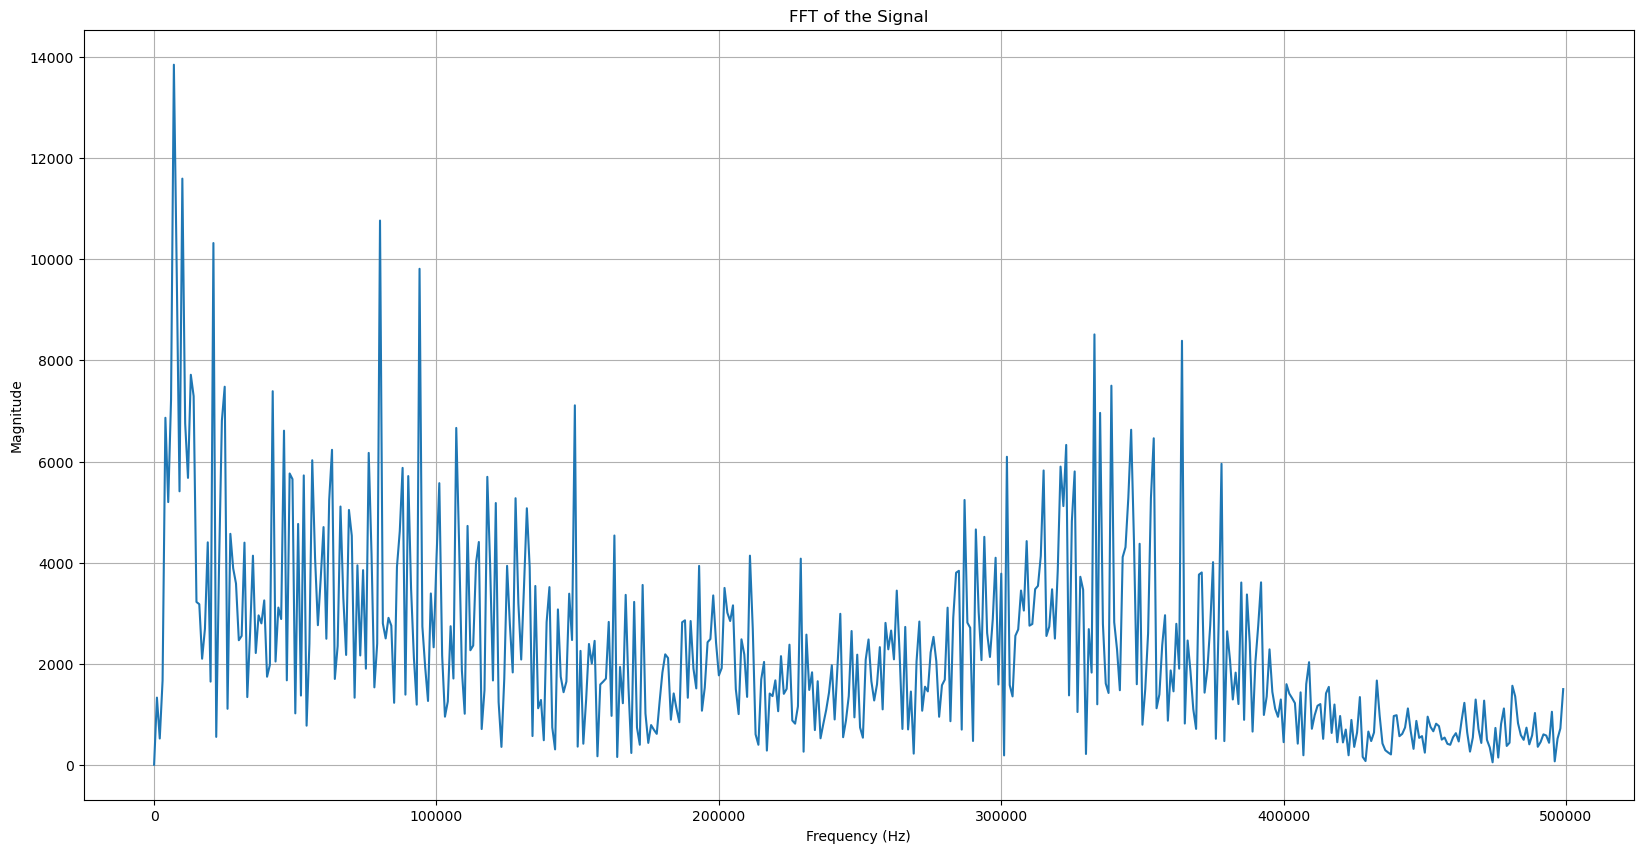

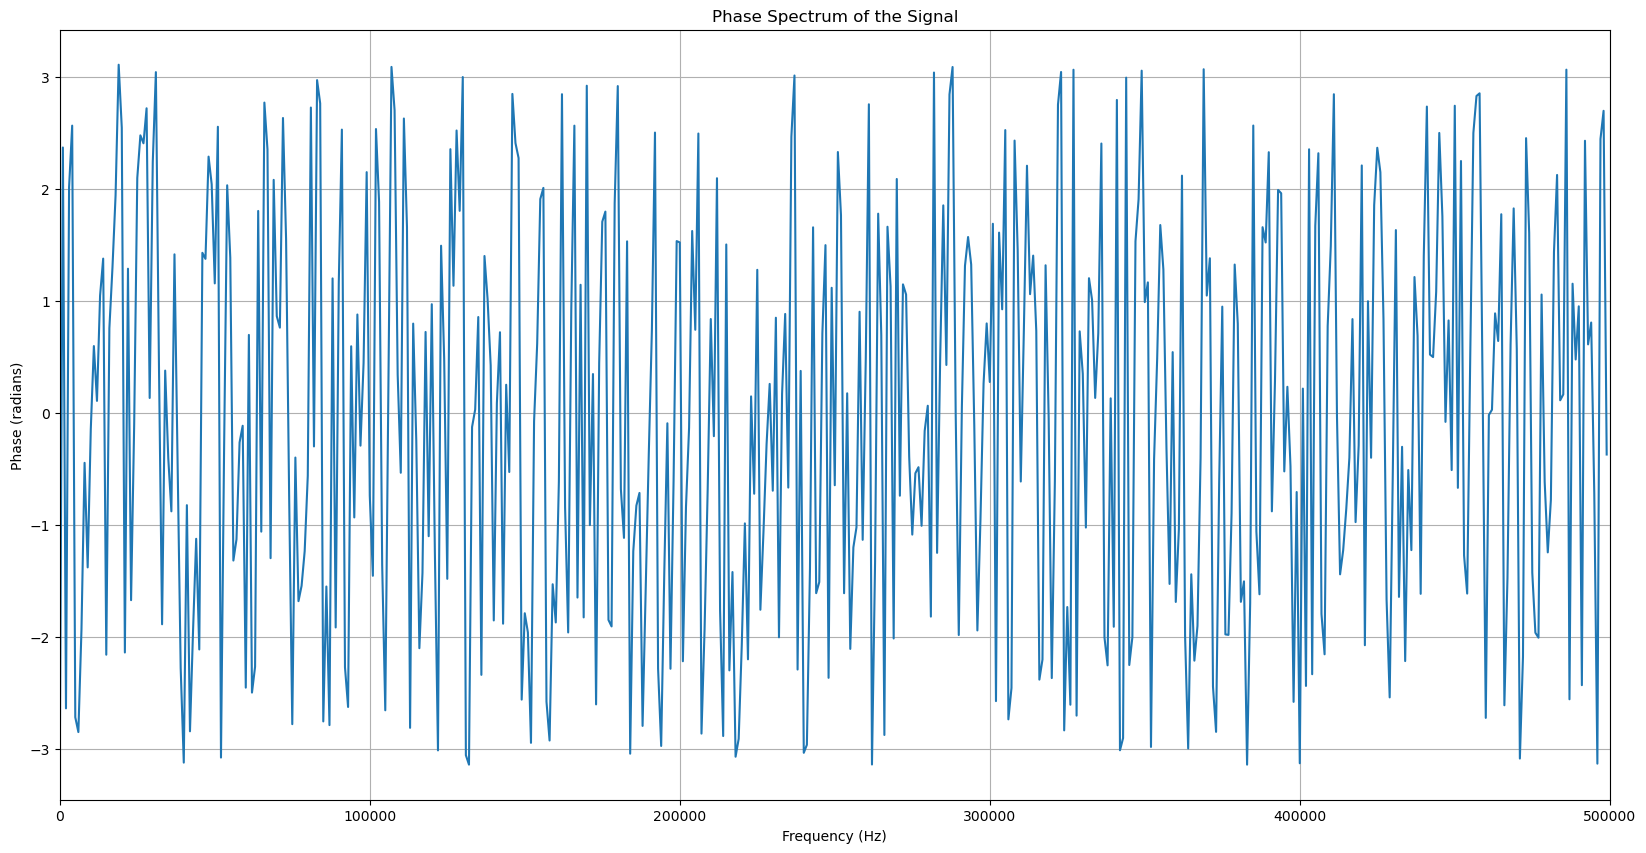

In [29]:
from scipy import fftpack
import numpy as np
import matplotlib.pyplot as plt

# Perform the FFT
X = fftpack.fft(x)
frequencies = fftpack.fftfreq(len(x), d=1/fs)

# Take the positive frequencies and corresponding FFT values
X_magnitude = np.abs(X[:len(frequencies)//200])
X_phase = np.angle(X[:len(frequencies)//200])  # Store the phase information
frequencies = frequencies[:len(frequencies)//200]

print(X_magnitude.shape)
print(X_phase.shape)
print(frequencies.shape)

# Plot the FFT result (Magnitude Spectrum)
plt.figure(figsize=(20, 10))
plt.title("FFT of the Signal")
plt.plot(frequencies, X_magnitude, label='Magnitude Spectrum')
#plt.xlim([0,5e5])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

# Plot the Phase Spectrum (optional)
plt.figure(figsize=(20, 10))
plt.title("Phase Spectrum of the Signal")
plt.plot(frequencies, X_phase, label='Phase Spectrum')
plt.xlim([0,5e5])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.grid(True)
plt.show()

In [25]:
print(X_phase.shape)

(50000,)


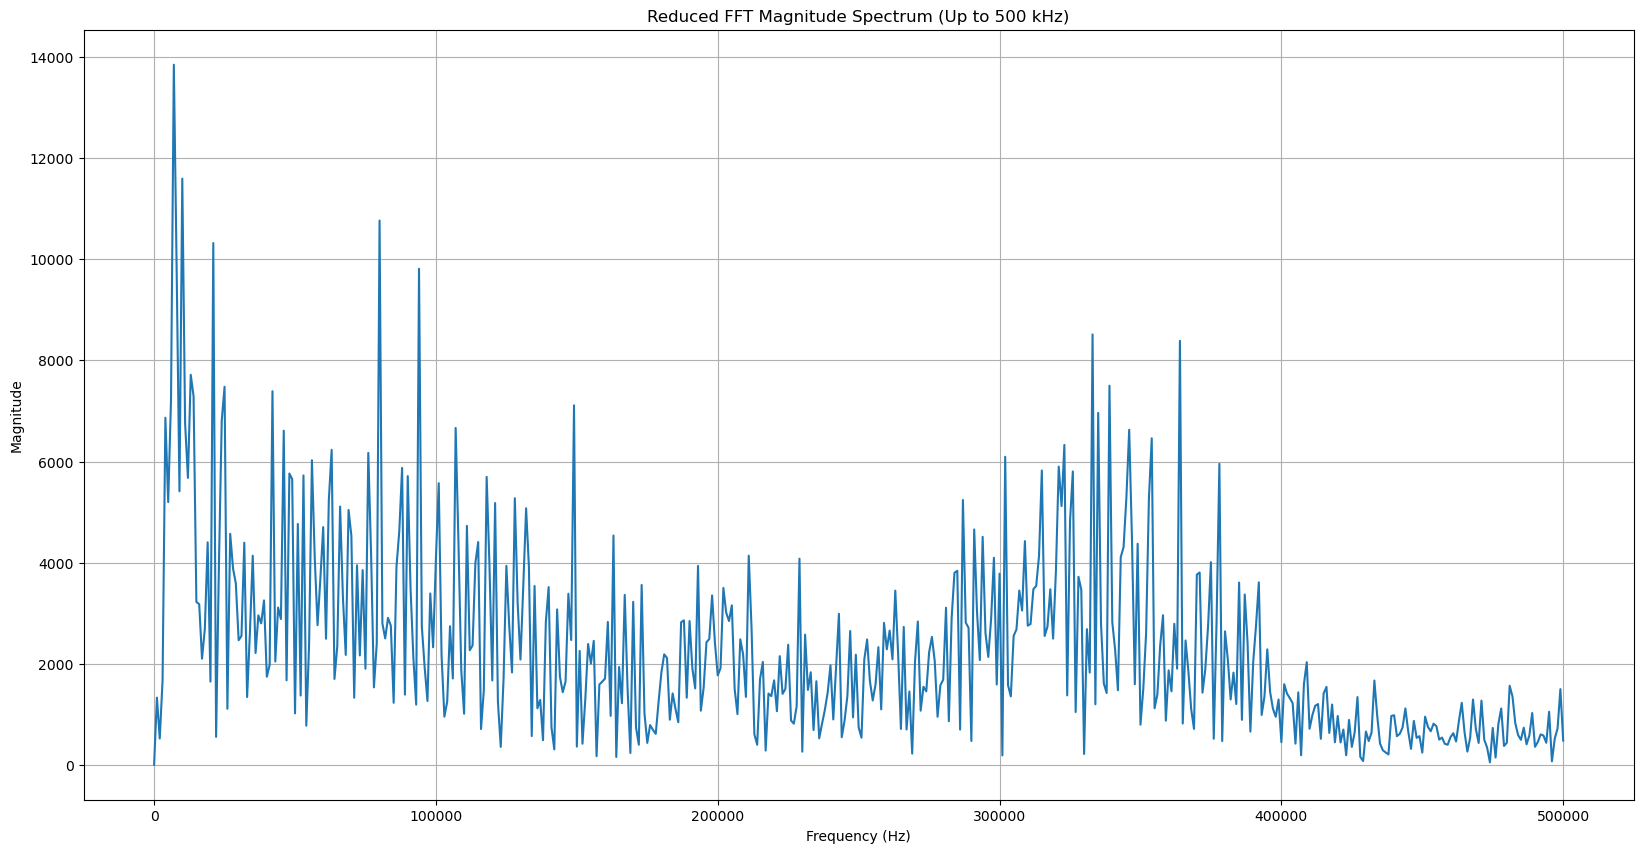

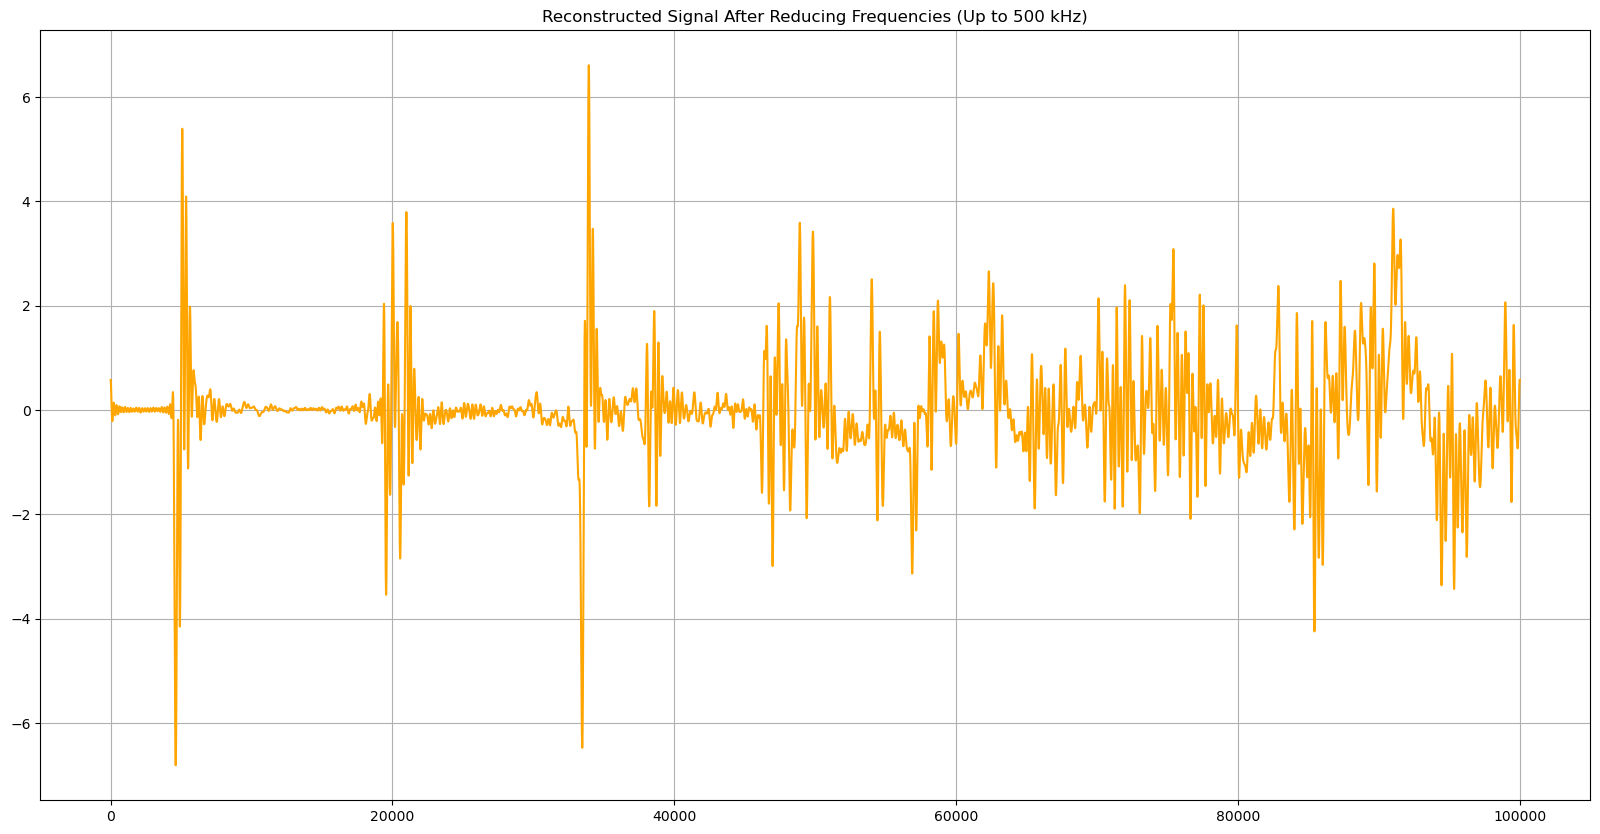

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack

# Perform the FFT
X = fftpack.fft(x)
frequencies = fftpack.fftfreq(len(x), d=1/fs)

# Define the frequency cut-off (500 kHz)
cutoff_freq = 500000

# Find the index where the frequency exceeds the cut-off
cutoff_index = np.argmax(frequencies > cutoff_freq)

# Reduce the size of X_magnitude and X_phase to only include up to 500 kHz
X_magnitude = np.abs(X[:cutoff_index])
X_phase = np.angle(X[:cutoff_index])
frequencies = frequencies[:cutoff_index]

# Now, reconstruct the signal using reduced frequency content
# Recreate the complex spectrum with reduced frequency content
X_reduced = np.zeros(len(x), dtype=complex)

# Set the magnitude and phase for the reduced frequency components
X_reduced[:cutoff_index] = X_magnitude * (np.cos(X_phase) + 1j * np.sin(X_phase))

# Mirror the positive frequencies to get negative frequencies for IFFT
X_reduced[-cutoff_index + 1:] = np.conj(X_reduced[1:cutoff_index][::-1])

# Perform the IFFT to reconstruct the signal
x_reconstructed = fftpack.ifft(X_reduced)

# Plot the magnitude spectrum of the reduced frequencies
plt.figure(figsize=(20, 10))
plt.title("Reduced FFT Magnitude Spectrum (Up to 500 kHz)")
plt.plot(frequencies, X_magnitude, label='Reduced Magnitude Spectrum')
#plt.xlim([0, 5e5])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

# Plot the reconstructed signal
plt.figure(figsize=(20, 10))
plt.title("Reconstructed Signal After Reducing Frequencies (Up to 500 kHz)")
plt.plot(np.real(x_reconstructed), label='Reconstructed Signal', color='orange')
plt.grid(True)
plt.show()


In [9]:
print(x.shape)
print(x_reconstructed.shape)

(100000,)
(100000,)
